# Kaggle Competition for HOUSE PRICE:Advanced Regression Techinques

### Loading Python Libraries

In [1]:
# for multiple statement print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





### Load the house Dataset:-

In [2]:
trn_df=pd.read_csv(r'C:\Users\ashis\Downloads\python_class\project_1\Kaggale_Competition\house-prices-advanced-regression-techniques\train.csv')
trn_df.head()
trn_df.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

In [3]:
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# un wanted column

In [4]:
trn_df = trn_df.drop('Id' ,axis=1)

In [5]:
drop_col = []
for i in trn_df.columns:
    if trn_df[i].isna().sum()>1300:
        drop_col.append(i)
    

In [6]:
drop_col

['Alley', 'PoolQC', 'MiscFeature']

In [7]:
trn_df = trn_df.drop(drop_col ,axis=1)
trn_df.shape

(1460, 77)

## identify categrical columns:-

In [8]:
cat_col  = trn_df.select_dtypes(include=['object']).columns
len(cat_col)
con_col = trn_df.select_dtypes(include=['int64' , 'float']).columns
len(con_col)

40

37

### Checking missing value on "train"

In [9]:
trn_df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
                 ... 
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual

<Figure size 1440x360 with 0 Axes>

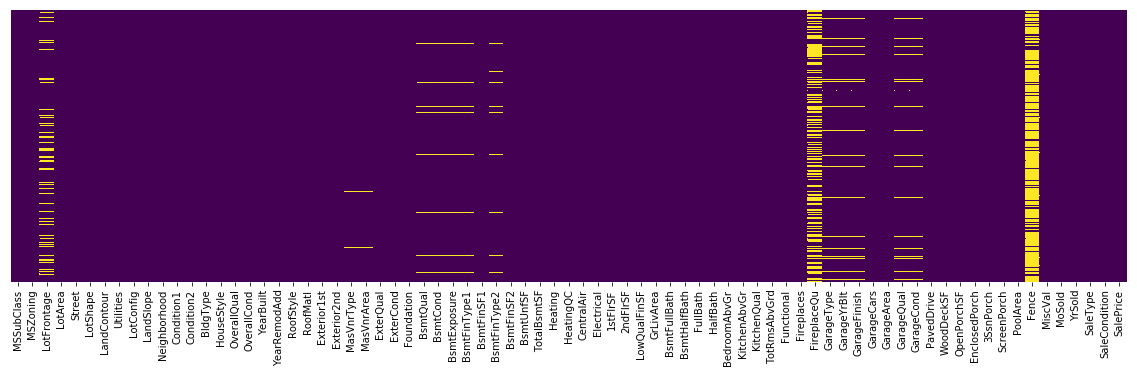

In [10]:
plt.figure(figsize=(20,5))
sns.heatmap(trn_df.isna(),yticklabels=False, cbar=False ,cmap='viridis')

# Handling missing value

In [11]:
miss_value = []
for i in cat_col:
    if trn_df[i].isna().sum()!=0:
        miss_value.append(i)

In [12]:
len(miss_value)

13

In [13]:
for i in miss_value:
    trn_df[i] = trn_df[i].fillna(trn_df[i].mode()[0])

In [14]:
miss =[]
for i in con_col:
    if trn_df[i].isna().sum()!=0:
        miss.append(i)

In [15]:
for i in miss:
    trn_df[i] = trn_df[i].fillna(trn_df[i].mean())

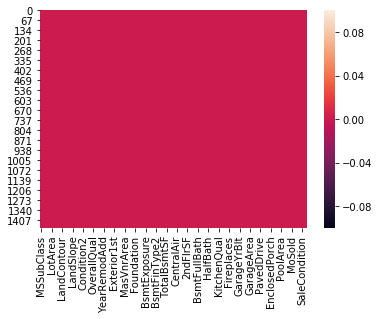

In [16]:
sns.heatmap(trn_df.isna())

# Target 

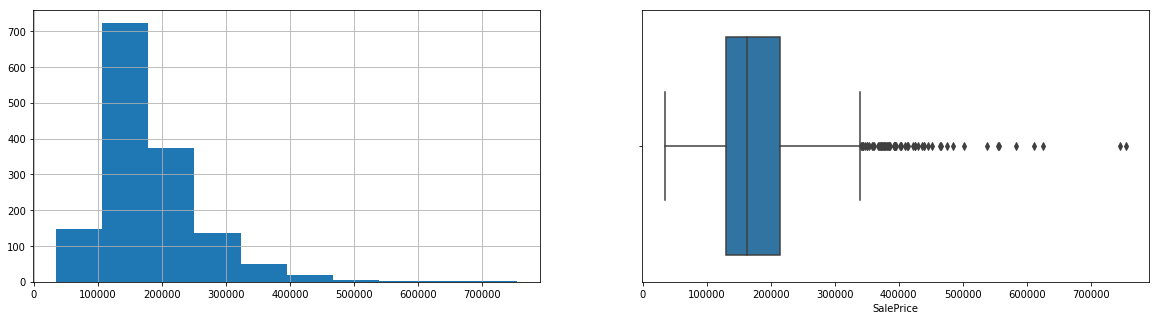

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(121)
trn_df.SalePrice.hist()
plt.subplot(122)
sns.boxplot(trn_df.SalePrice);

#  Handle Categrical Variable
- One hot Coding

In [18]:
train = pd.get_dummies(trn_df[cat_col] ,drop_first=True)
train.shape,trn_df[con_col].shape
train_final = pd.concat([train ,trn_df[con_col]] , axis=1)
train_final.shape


((1460, 203), (1460, 37))

(1460, 240)

# Test Processing

In [19]:
test_df=pd.read_csv(r'C:\Users\ashis\Downloads\python_class\project_1\Kaggale_Competition\house-prices-advanced-regression-techniques\test_final.csv')

In [20]:
test_df.shape

(1459, 76)

# independent & dependent

In [21]:
x = train_final.drop('SalePrice' ,axis=1)
y = train_final['SalePrice']
x.shape,y.shape


((1460, 239), (1460,))

# Model Building:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,roc_auc_score ,classification_report,roc_curve,auc

In [23]:
x_train ,x_test,y_train ,y_test = train_test_split( x,y,test_size=.30 , random_state = 101)
x_train.shape , y_train.shape ,x_test.shape ,y_test.shape

((1022, 239), (1022,), (438, 239), (438,))

In [24]:
# Logistic

from sklearn.linear_model import LinearRegression
log = LinearRegression()
log.fit(x_train ,y_train)
pres1 = log.predict(x_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
import xgboost
clf = xgboost.XGBRegressor()
clf.fit(x_train ,y_train)

C:\Users\ashis\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:31:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [26]:
prediction = clf.predict(x_test)  # predictionn salePrice of House
prediction

array([259839.84 , 127826.445, 145342.4  , 401989.6  , 395268.25 ,
       109523.79 , 130540.516, 155835.2  , 151190.8  , 138152.95 ,
       126621.266, 142454.52 , 127267.59 , 152685.   , 157485.97 ,
       178032.27 , 140816.38 , 123566.24 , 143250.17 , 232071.45 ,
       151625.44 ,  90047.02 , 186670.08 , 156034.92 , 223252.23 ,
       133704.16 , 109305.555, 183316.   , 191229.06 , 109165.3  ,
       202599.4  , 155937.94 , 180228.53 , 281488.22 ,  58604.2  ,
        98541.73 , 427264.22 , 216059.1  , 114647.31 ,  92832.02 ,
       244632.69 , 192418.81 , 207399.27 , 187996.86 , 120625.266,
       126853.27 , 324478.47 , 182870.92 , 126896.77 , 125336.52 ,
       143185.73 , 288164.84 , 121617.836, 180781.86 , 178074.92 ,
       143421.4  , 193999.08 , 253440.19 , 178102.66 , 244053.22 ,
       195259.14 , 159283.25 , 131744.72 ,  96394.64 , 121346.53 ,
       182636.95 , 110757.21 , 201386.22 , 169876.94 , 208040.78 ,
       164586.81 , 132403.11 , 188902.66 , 175219.16 , 113504.

In [27]:
pres = pd.DataFrame(prediction)
submission =pd.read_csv(r'C:\Users\ashis\Downloads\python_class\project_1\Kaggale_Competition\house-prices-advanced-regression-techniques\sample_submission.csv')

In [28]:
submission.head()
submission.shape

,Id,SalePrice
0,1461,259839.840
1,1462,127826.445
2,1463,145342.400
3,1464,401989.600
4,1465,395268.250


(1459, 2)

In [29]:
submission_File = pd.concat([submission['Id'] ,pres] ,axis=1)
submission_File.columns = ['Id','SalePrice']
submission_File.to_csv(R'C:\Users\ashis\Downloads\python_class\project_1\Kaggale_Competition\sample_submission.csv' ,index=False)

In [30]:
submission_File.shape

(1459, 2)

In [31]:
submission_File.head()

,Id,SalePrice
0,1461,259839.843750
1,1462,127826.445312
2,1463,145342.406250
3,1464,401989.593750
4,1465,395268.250000


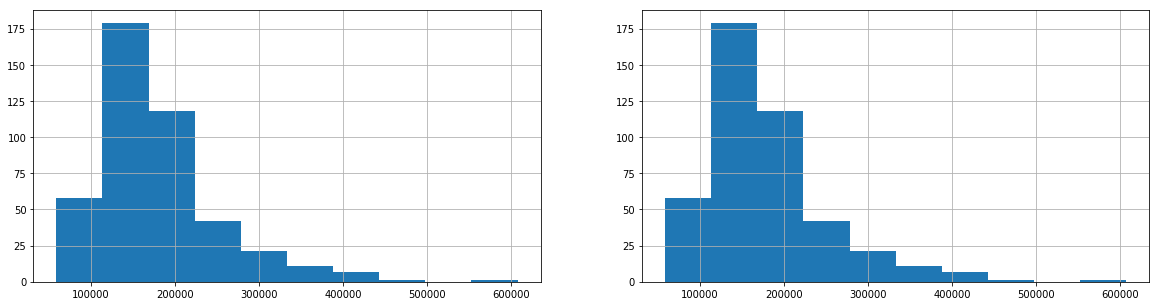

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(121)
submission.SalePrice.hist()
plt.subplot(122)
submission_File.SalePrice.hist();